In [1]:
from scipy.io import loadmat

# Load the .MAT file
data = loadmat('/kaggle/input/whu-hyperspectral-dataset/WHU-Hi-LongKou/WHU_Hi_LongKou.mat')

# Print available keys/variables in the dataset
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'WHU_Hi_LongKou'])


In [2]:
import numpy as np
# Access the content of 'WHU_Hi_LongKou'
longkou_data = data['WHU_Hi_LongKou']

# Check the type and structure
print(type(longkou_data))
print(longkou_data.dtype)  # If it's a NumPy array, this will provide more details
print(longkou_data.shape)  # If it's a NumPy array, check its dimensions

# If it looks like a structured array or dictionary, print keys or field names
if isinstance(longkou_data, np.ndarray):
    print(longkou_data)


<class 'numpy.ndarray'>
float32
(550, 400, 270)
[[[ 0.11914432  0.4523278   0.5890478  ...  8.633758    8.413543
    8.8901205 ]
  [ 0.26605487  0.43666995  0.68460506 ...  8.744693    8.196497
    8.692479  ]
  [ 0.13548897  0.5527791   0.56557286 ...  8.821       8.447286
    8.567034  ]
  ...
  [ 0.18725206  0.41301754  0.6007176  ... 12.695165   13.026531
   13.208923  ]
  [ 0.19299987  0.50547904  0.72392505 ... 12.857188   12.940057
   12.857613  ]
  [ 0.20652154  0.5545493   0.68340653 ... 12.434352   12.8901825
   12.42505   ]]

 [[ 0.18990183  0.44629064  0.6315769  ...  9.140132    8.747664
    8.734673  ]
  [ 0.15167215  0.40927827  0.6479068  ...  8.590359    8.53363
    9.2480955 ]
  [ 0.16756018  0.5589234   0.6003149  ...  8.631819    8.573527
    9.016789  ]
  ...
  [ 0.19278923  0.35343558  0.97300845 ... 13.069389   13.403014
   13.53222   ]
  [ 0.14915654  0.50214165  0.7291968  ... 13.281838   12.9276705
   13.487201  ]
  [ 0.14915654  0.50214165  0.7291968  ... 13.

In [3]:
import scipy.io as sio
import numpy as np

# Paths to the dataset files
data_path = '/kaggle/input/whu-hyperspectral-dataset/WHU-Hi-LongKou/WHU_Hi_LongKou.mat'
ground_truth_path = '/kaggle/input/whu-hyperspectral-dataset/WHU-Hi-LongKou/WHU_Hi_LongKou_gt.mat'

# Load the hyperspectral data
data = sio.loadmat(data_path)
hyperspectral_data = data['WHU_Hi_LongKou']  

# Load the ground truth data
ground_truth = sio.loadmat(ground_truth_path)
ground_truth_data = ground_truth['WHU_Hi_LongKou_gt']  

# Print information about the data
print("Hyperspectral Data Shape:", hyperspectral_data.shape)
print("Ground Truth Data Shape:", ground_truth_data.shape)

# Optional: Normalize the hyperspectral data
hyperspectral_data = hyperspectral_data.astype(np.float32)
normalized_data = (hyperspectral_data - np.min(hyperspectral_data)) / (np.max(hyperspectral_data) - np.min(hyperspectral_data))

print("Normalized Data Shape:", normalized_data.shape)
print("Unique labels in ground truth:", np.unique(ground_truth_data))  

Hyperspectral Data Shape: (550, 400, 270)
Ground Truth Data Shape: (550, 400)
Normalized Data Shape: (550, 400, 270)
Unique labels in ground truth: [0 1 2 3 4 5 6 7 8 9]


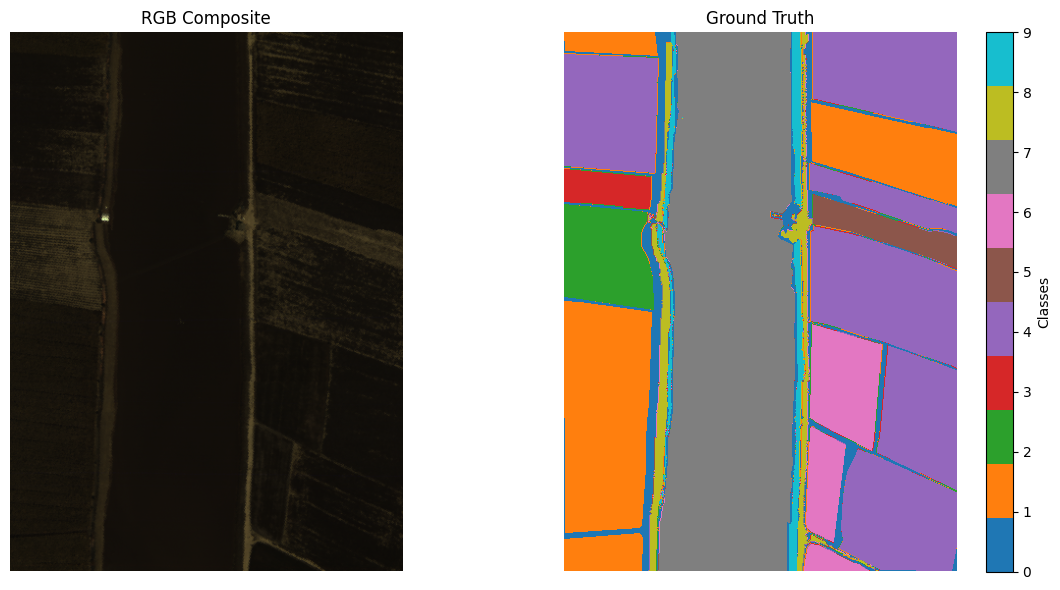

In [4]:
import matplotlib.pyplot as plt

# RGB Composite for visualization (use specific bands)
red_band = normalized_data[:, :, 50]  # Adjust band indices based on dataset
green_band = normalized_data[:, :, 30]
blue_band = normalized_data[:, :, 10]
rgb_image = np.dstack((red_band, green_band, blue_band))

# Plot the RGB image and ground truth
plt.figure(figsize=(12, 6))

# RGB Composite
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("RGB Composite")
plt.axis("off")

# Ground Truth
plt.subplot(1, 2, 2)
plt.imshow(ground_truth_data, cmap='tab10')
plt.title("Ground Truth")
plt.colorbar(label="Classes")
plt.axis("off")

plt.tight_layout()
plt.show()

In [28]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.io import loadmat

def load_and_preprocess_data(hyper_file, label_file, patch_size, n_components=30):
    # Load data and labels
    hyperspectral_data = loadmat(hyper_file)['WHU_Hi_LongKou']
    ground_truth = loadmat(label_file)['WHU_Hi_LongKou_gt']

    # Normalize hyperspectral data
    hyperspectral_data = (hyperspectral_data - hyperspectral_data.min()) / (hyperspectral_data.max() - hyperspectral_data.min())

    # Apply PCA to reduce spectral dimensions
    reshaped_data = hyperspectral_data.reshape(-1, hyperspectral_data.shape[2])
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(reshaped_data)
    reduced_data = reduced_data.reshape(hyperspectral_data.shape[0], hyperspectral_data.shape[1], -1)

    return reduced_data, ground_truth


In [29]:
def create_patches(data, labels, patch_size):
    margin = patch_size // 2
    padded_data = np.pad(data, [(margin, margin), (margin, margin), (0, 0)], mode='reflect')
    patches, patch_labels = [], []

    for i in range(margin, data.shape[0] + margin):
        for j in range(margin, data.shape[1] + margin):
            patch = padded_data[i - margin:i + margin + 1, j - margin:j + margin + 1, :]
            patches.append(patch)
            patch_labels.append(labels[i - margin, j - margin])

    return np.array(patches), np.array(patch_labels)


In [7]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class CNN(nn.Module):
#     def __init__(self, num_bands, num_classes):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv3d(1, 128, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv3d(128, 256, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv3d(256, 256, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv3d(256, 128, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(128, 128)
#         self.fc2 = nn.Linear(128, num_classes)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = F.relu(self.conv2(x))
#         x = F.relu(self.conv3(x))
#         x = F.relu(self.conv4(x))
#         x = torch.flatten(x, 1)  # Flatten for FC layer
#         x = F.relu(self.fc1(x))
#         return F.softmax(self.fc2(x), dim=1)


In [30]:
import torch
import torch.nn.functional as F

class CRF(torch.nn.Module):
    def __init__(self, num_classes, weight_smoothness=1.0, weight_boundary=1.0):
        super(CRF, self).__init__()
        self.num_classes = num_classes
        self.weight_smoothness = weight_smoothness
        self.weight_boundary = weight_boundary

    def forward(self, logits, features, neighborhood_connectivity=4):
        """
        - logits: [B, C, H, W] (predicted probabilities from CNN)
        - features: [B, F, H, W] (e.g., raw image or reduced hyperspectral data for pairwise terms)
        """
        # Unary potentials (logits converted to negative log probabilities)
        unary = -F.log_softmax(logits, dim=1)

        # Pairwise potentials (spatial smoothness using neighbors)
        batch_size, _, height, width = logits.shape
        pairwise = torch.zeros_like(unary)

        # Incorporate smoothness by comparing neighbors
        for i in range(height):
            for j in range(width):
                neighbors = self._get_neighbors(i, j, height, width, neighborhood_connectivity)
                for (ni, nj) in neighbors:
                    diff = torch.sum((features[:, :, i, j] - features[:, :, ni, nj])**2, dim=1)
                    pairwise[:, :, i, j] += self.weight_smoothness * torch.exp(-self.weight_boundary * diff)

        # Compute combined CRF potential
        crf_potential = unary + pairwise
        return torch.softmax(-crf_potential, dim=1)

    def _get_neighbors(self, i, j, height, width, connectivity):
        """Get valid neighbors of a pixel based on the connectivity."""
        neighbors = []
        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # 4-connectivity
            if 0 <= i + di < height and 0 <= j + dj < width:
                neighbors.append((i + di, j + dj))
        return neighbors


In [31]:
from torch.utils.data import DataLoader, Dataset

class HyperspectralDataset(Dataset):
    def __init__(self, patches, labels):
        self.patches = patches
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.patches[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)



In [32]:
# File paths
hyper_file = '/kaggle/input/whu-hyperspectral-dataset/WHU-Hi-LongKou/WHU_Hi_LongKou.mat'  # Replace with your hyperspectral file path
label_file = '/kaggle/input/whu-hyperspectral-dataset/WHU-Hi-LongKou/WHU_Hi_LongKou_gt.mat'                      # Replace with your ground truth file path

# Parameters
patch_size = 1
num_components = 30

# Load and preprocess the data
reduced_data, ground_truth = load_and_preprocess_data(hyper_file, label_file, patch_size, n_components=num_components)

# Extract patches
patches, patch_labels = create_patches(reduced_data, ground_truth, patch_size)

# Print data shapes for debugging
print(f"Patches shape: {patches.shape}")
print(f"Patch labels shape: {patch_labels.shape}")


Patches shape: (220000, 1, 1, 30)
Patch labels shape: (220000,)


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_bands, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(128, 256, kernel_size=3, padding=1)
        self.conv3 = nn.Conv3d(256, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv3d(256, 128, kernel_size=3, padding=1)

        # Flattened size = 128 * 3 * 3 ex. for patch size 3
        self.fc1 = nn.Linear(3840, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))

        # Flatten the output for FC layers
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        return F.softmax(self.fc2(x), dim=1)


# Training parameters
num_classes = np.unique(ground_truth).size  # Number of classes in the ground truth
batch_size = 64
learning_rate = 0.001
num_epochs = 1

# Prepare dataset and dataloader
dataset = HyperspectralDataset(patches, patch_labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define model, loss, and optimizer
model = CNN(num_bands=patches.shape[-1], num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch in dataloader:
        inputs, labels = batch
        inputs = inputs.unsqueeze(1)  # Add channel dimension for 3D CNN

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/1, Loss: 1.6786


In [34]:
def predict_with_crf(model, data, image, num_classes):
    model.eval()
    with torch.no_grad():
        # Generate probability map
        inputs = torch.tensor(data).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
        probability_map = model(inputs).squeeze(0).cpu().numpy()

    # Apply CRF
    refined_labels = apply_crf(probability_map, image, num_classes)
    return refined_labels


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_image(patch_predictions, original_shape, patch_size):
    """
    Reconstruct the full image from patch predictions.
    
    Parameters:
    - patch_predictions: Array of predicted labels for each patch
    - original_shape: Tuple of the original image (Height, Width)
    - patch_size: Size of each patch (e.g., 3x3)

    Returns:
    - reconstructed_image: 2D array of size (Height, Width) with predicted labels
    """
    margin = patch_size // 2
    reconstructed_image = np.zeros(original_shape)

    idx = 0
    for i in range(margin, original_shape[0] + margin):
        for j in range(margin, original_shape[1] + margin):
            reconstructed_image[i - margin, j - margin] = patch_predictions[idx]
            idx += 1

    return reconstructed_image


In [36]:
# Assuming `model` is your trained CNN model and `patches` is your test data
model.eval()  # Set the model to evaluation mode
patch_predictions = []

with torch.no_grad():
    for patch in patches:
        patch_tensor = torch.tensor(patch, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dims
        output = model(patch_tensor)  # Pass patch through model
        predicted_label = torch.argmax(output, dim=1).item()  # Get the class label with highest probability
        patch_predictions.append(predicted_label)

patch_predictions = np.array(patch_predictions)


In [37]:
print(f"Number of patches: {len(patches)}")
print(f"Number of predictions: {len(patch_predictions)}")


Number of patches: 220000
Number of predictions: 220000


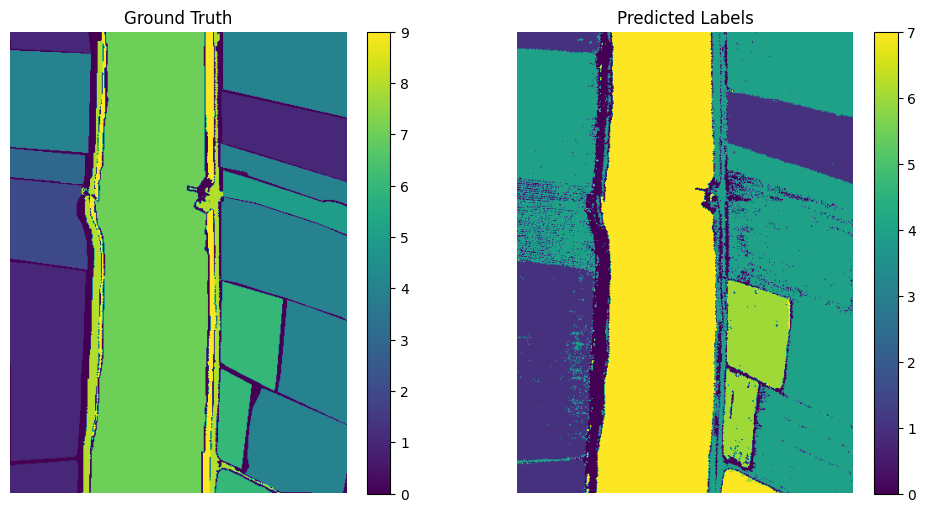

In [38]:

predicted_image = reconstruct_image(patch_predictions, ground_truth.shape, patch_size=3)


plt.figure(figsize=(12, 6))

# Ground truth
plt.subplot(1, 2, 1)
plt.title("Ground Truth")
plt.imshow(ground_truth, cmap='viridis')
plt.colorbar()
plt.axis("off")

# Predicted labels
plt.subplot(1, 2, 2)
plt.title("Predicted Labels")
plt.imshow(predicted_image, cmap='viridis')
plt.colorbar()
plt.axis("off")

plt.show()

In [39]:
def calculate_accuracy(predicted_image, ground_truth):
    correct_pixels = np.sum(predicted_image == ground_truth)
    total_pixels = ground_truth.size
    accuracy = correct_pixels / total_pixels
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(predicted_image, ground_truth)
print(f"Pixel-wise Accuracy: {accuracy:.2f}")


Pixel-wise Accuracy: 0.82


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_classification(predicted_image, ground_truth):
    # Flatten images
    y_true = ground_truth.flatten()
    y_pred = predicted_image.flatten()

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification report
    report = classification_report(y_true, y_pred, target_names=[f"Class {i}" for i in range(conf_matrix.shape[0])])
    print("\nClassification Report:")
    print(report)

# Evaluate classification
evaluate_classification(predicted_image, ground_truth)


Confusion Matrix:
[[ 7184  1647     0     0  3723     0   816  2088     0     0]
 [   16 33841     0     0   648     0     6     0     0     0]
 [ 1400     4     0     0  6970     0     0     0     0     0]
 [   10     0     0     0  3021     0     0     0     0     0]
 [ 1116   256     0     0 61838     0     2     0     0     0]
 [  763     0     0     0  3388     0     0     0     0     0]
 [  220    82     0     0     0     0 10522  1030     0     0]
 [   10     0     0     0     0     0     0 67046     0     0]
 [ 4373     0     0     0  2751     0     0     0     0     0]
 [ 1744   228     0     0  3197     0    51     9     0     0]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.43      0.46      0.44     15458
     Class 1       0.94      0.98      0.96     34511
     Class 2       0.00      0.00      0.00      8374
     Class 3       0.00      0.00      0.00      3031
     Class 4       0.72      0.98      0.83     63212
  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.decomposition import PCA

def hyperspectral_to_pca_rgb(hyperspectral_data, n_components=3):
    """
    Converts hyperspectral data into an RGB image using PCA.

    Parameters:
    - hyperspectral_data: Hyperspectral data (H, W, Bands)
    - n_components: Number of principal components to reduce to (default=3)

    Returns:
    - pca_rgb_image: RGB image based on principal components (H, W, 3)
    """
    reshaped_data = hyperspectral_data.reshape(-1, hyperspectral_data.shape[2])  # Flatten to 2D
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(reshaped_data)

    # Reshape back to spatial dimensions
    pca_rgb_image = pca_data[:, :3].reshape(hyperspectral_data.shape[0], hyperspectral_data.shape[1], 3)

    # Normalize to [0, 1] range for visualization
    pca_rgb_image = (pca_rgb_image - np.min(pca_rgb_image)) / (np.max(pca_rgb_image) - np.min(pca_rgb_image))
    return pca_rgb_image


In [42]:
original_hyperspectral_rgb = hyperspectral_to_pca_rgb(reduced_data)


In [43]:
def overlay_predictions(original_image, predicted_image, alpha=0.5):
    """
    Overlay predicted labels on top of the original image.
    
    Parameters:
    - original_image: RGB image (H, W, 3) normalized to [0, 1]
    - predicted_image: 2D array of predicted labels (H, W)
    - alpha: Transparency factor for overlay

    Returns:
    - overlayed_image: Image with overlay
    """
    from matplotlib.colors import ListedColormap

    # Create a colormap for predictions
    cmap = ListedColormap(['blue', 'green', 'red', 'yellow', 'cyan', 'magenta'])

    # Normalize images
    original_image = (original_image - original_image.min()) / (original_image.max() - original_image.min())

    # Overlay predictions
    overlayed_image = (1 - alpha) * original_image + alpha * cmap(predicted_image / predicted_image.max())[..., :3]
    return overlayed_image


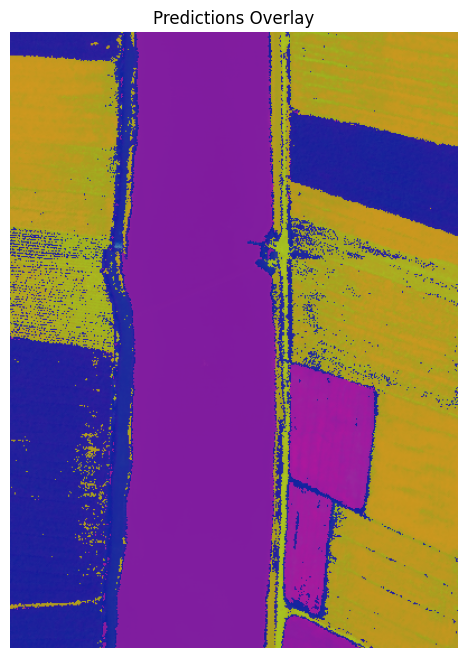

In [44]:
overlayed_image = overlay_predictions(original_hyperspectral_rgb, predicted_image)

plt.figure(figsize=(8, 8))
plt.imshow(overlayed_image)
plt.axis("off")
plt.title("Predictions Overlay")
plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plot the confusion matrix as an image.
    
    Parameters:
    - y_true: Ground truth labels (flattened 1D array)
    - y_pred: Predicted labels (flattened 1D array)
    - class_names: List of class names corresponding to labels
    """
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [46]:
y_true = ground_truth.flatten()  # Flatten ground truth
y_pred = predicted_image.flatten()  # Flatten predicted labels


In [47]:
class_names = [f"Class {i}" for i in range(np.unique(y_true).size)]


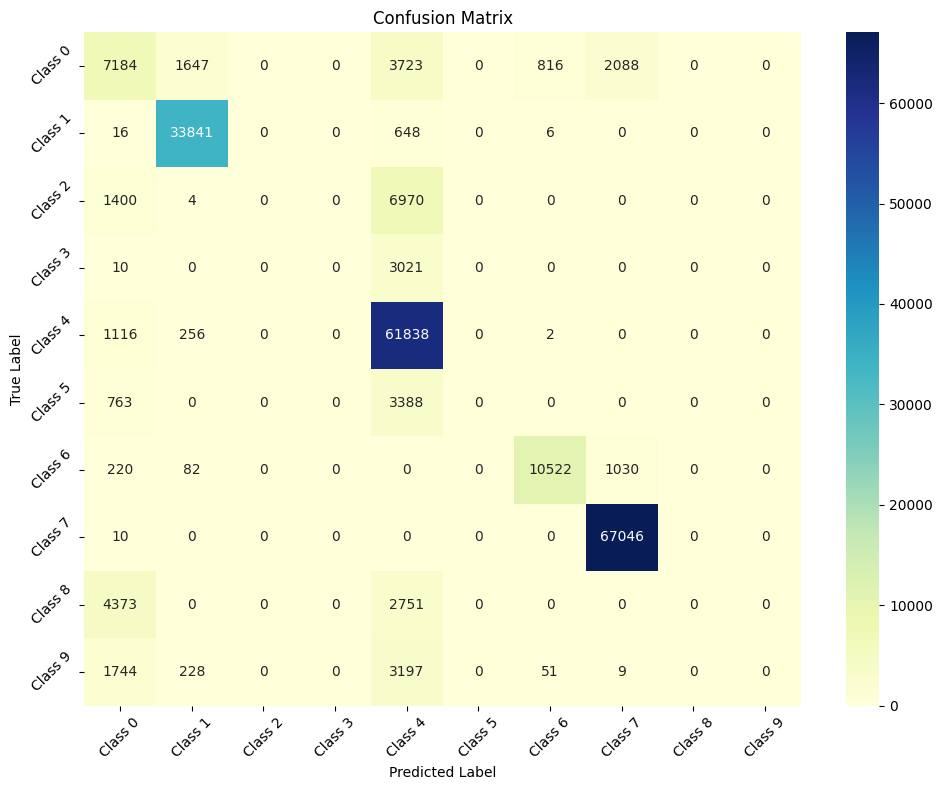

In [48]:
plot_confusion_matrix(y_true, y_pred, class_names)
